<img height="100" width="200" src="solidario_logo.png" >


<center><h1><u>Analytics </u></h1></center><center><h2>Mateo Llerena</h2></center>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Deserción

Del conjuto de datos a analizar, la variable “Exited” indica que si cliente ha desertado, en adelante
la llamaremos “Deserción”. El objetivo de este ejercicio es:

1. Encontrar las variables más relevantes para discriminar entre clientes que desertan y
clientes que no desertan.
2. Elaborar un modelo con las variables que identificadas que más discriminan la deserción
con el objetivo de predecir la deserción.
3. Comentar e interpretar los resultados del modelo.
4. Elaborar un modelo logit con las mismas variables del modelo anterior.
5. Comentar e interpretar los resultados del modelo.
6. Comparar los resultados del modelo logit vs el otro modelo. ¿Cuál es mejor? ¿Por qué?

## Descripción de los datos

* **RowNumber**:no of rows
* **CustomerId**:id number of a customer
* **Surname**:name of a customer
* **CreditScore**:A credit score is a statistical number that evaluates a consumer's creditworthiness and is based on credit history:
* **Geography**:A geographer tries to understand the world and the things that are in it, how they started and how they have changed.
* **Gender**:male or female
* **Age**:before death
* **Tenure**:the conditions under which land or buildings are held or occupied.
* **Balance**:money left in bank account
* **NumOfProducts**:how many products
* **HasCrCard**:how many credit cards per person
* **IsActiveMember**:he or she active in bank or not
* **EstimatedSalary**:salary per average person
* **Exited**:those who are left and not left the bank left the bankthose who are left and not left the bank

In [9]:
#importación y lectura de archivo .csv
df=pd.read_csv('Bank_churn_modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
#Reviso información general de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
#verifico la dimensión del dataframe
df.shape

(10000, 14)

## Limpieza y transformación de los datos

In [13]:
#Reviso nulos
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

> No existen valores nulos. OK

In [15]:
#Reviso duplicados
df.duplicated().sum()

0

> No existen valores duplicados. OK

In [17]:
#Elimino la columna 'RowNumber' ya que no es relevante para el análisis
df.drop('RowNumber',axis=1,inplace=True)

In [18]:
#Reviso la columna 'Tenure' y observo que sus estadísticas descriptivas están muy bien distribuidas. Por lo que no aportará sustancialmente al análisis.
df['Tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

In [19]:
# Elimino la columna 'Tenure'
#df.drop('Tenure',axis=1,inplace=True)

In [20]:
# Me aseguro que no tengo Id de Clientes repetidos
df['CustomerId'].duplicated().sum()

0

## Análisis exploratorio de datos (EDA)

### Análisis univariado

In [23]:
#Reviso las columnas del dataframe
df.keys()

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [24]:
# Discrimino variables categóricas y numéricas
columnas_categoricas=['Geography','Gender', 'Tenure', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'Exited']
columnas_numericas=['CreditScore','Age','Balance','EstimatedSalary']

#### Variables categóricas

Obtener la distribución de las variables categóricas

In [27]:
#Obtengo la distribución de cada variable cualitativa

for columna in columnas_categoricas:
    valores = df[columna].value_counts()
    proporciones = df[columna].value_counts(normalize=True)*100
    resultado = pd.DataFrame({'Cantidad': valores, 'Porcentaje': proporciones})
    print("\n",columna.upper(),"\n",resultado)


 GEOGRAPHY 
            Cantidad  Porcentaje
Geography                      
France         5014       50.14
Germany        2509       25.09
Spain          2477       24.77

 GENDER 
         Cantidad  Porcentaje
Gender                      
Male        5457       54.57
Female      4543       45.43

 TENURE 
         Cantidad  Porcentaje
Tenure                      
2           1048       10.48
1           1035       10.35
7           1028       10.28
8           1025       10.25
5           1012       10.12
3           1009       10.09
4            989        9.89
9            984        9.84
6            967        9.67
10           490        4.90
0            413        4.13

 NUMOFPRODUCTS 
                Cantidad  Porcentaje
NumOfProducts                      
1                  5084       50.84
2                  4590       45.90
3                   266        2.66
4                    60        0.60

 HASCRCARD 
            Cantidad  Porcentaje
HasCrCard                      

#### Visualización de datos 

C:\Users\mateo\AppData\Local\Temp\ipykernel_24132\150838401.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graf = sns.countplot(df, y=columna, ax=ax[i], order=orden, legend=False, palette=["#1dbfde",'#697565','#B7B7B7','lightgray'])
C:\Users\mateo\AppData\Local\Temp\ipykernel_24132\150838401.py:9: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  graf = sns.countplot(df, y=columna, ax=ax[i], order=orden, legend=False, palette=["#1dbfde",'#697565','#B7B7B7','lightgray'])
C:\Users\mateo\AppData\Local\Temp\ipykernel_24132\150838401.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graf = sns.countplot(df, y=columna, ax=ax[i], order=orden, legend=False, palette=["#

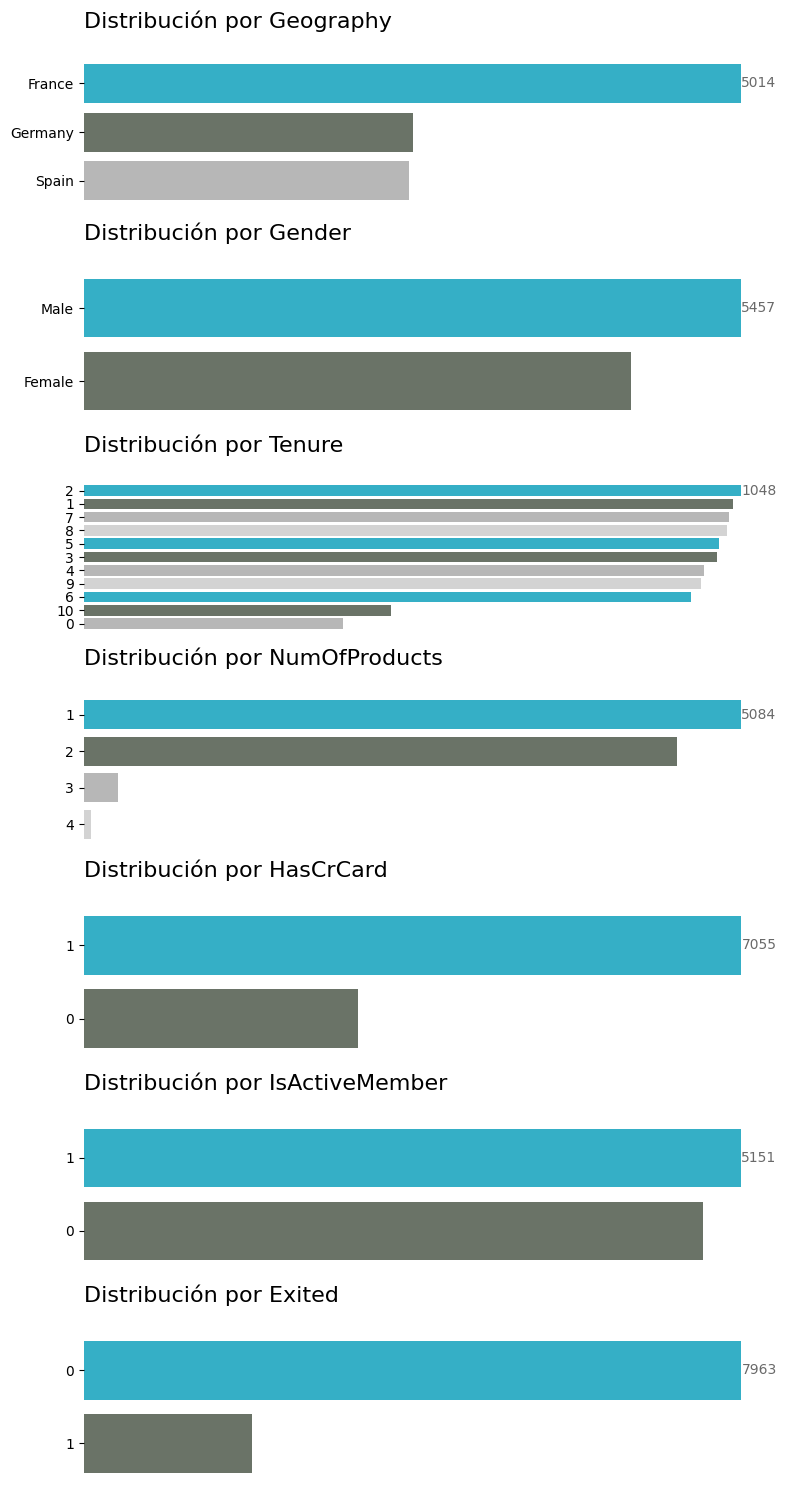

In [29]:
# Crear los gráficos necesarios

fig, ax = plt.subplots(len(columnas_categoricas), 1, figsize=(8, 15))

for columna in columnas_categoricas:
    i=columnas_categoricas.index(columna)   
    # Obtener el orden de los valores más altos a más bajos
    orden = df[columna].value_counts().index
    graf = sns.countplot(df, y=columna, ax=ax[i], order=orden, legend=False, palette=["#1dbfde",'#697565','#B7B7B7','lightgray'])

    
    # Quitar el borde del gráfico
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    
    # Quitar la marcas del eje x
    ax[i].tick_params(axis='x', which='both', length=0)
    ax[i].set_xticklabels([])
    
    # Nombres de los ejes
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    
    # Título del gráfico
    ax[i].set_title("Distribución por "+ columna+'\n', size=16, loc='left')
    graf.bar_label(graf.containers[0], size=10, color='dimgray')
    
plt.tight_layout()
plt.show()

De las tablas y gráficos anteriores se puede observar de los clientes que:
* > El 50% son de Francia
* > El 54% son hombres
* > Un 10% de los clientes aproximadamente se reparten para tenure de 1 a 9. Excepto tenure de 0 y 10 que se reparten un 4% de los clientes
* > El 95% posee entre 1 y 2 productos del banco
* > El 70% posee tarjeta de crédito
* > El 51% es miembro activo del banco
* > **El 20% ha desertado**

#### Variables numéricas

Obtengo las estadisticas descriptivas

In [33]:
df[columnas_numericas].describe()

,CreditScore,Age,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881
std,96.653299,10.487806,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,51002.110000
50%,652.000000,37.000000,97198.540000,100193.915000
75%,718.000000,44.000000,127644.240000,149388.247500
max,850.000000,92.000000,250898.090000,199992.480000


#### Visualización de datos 

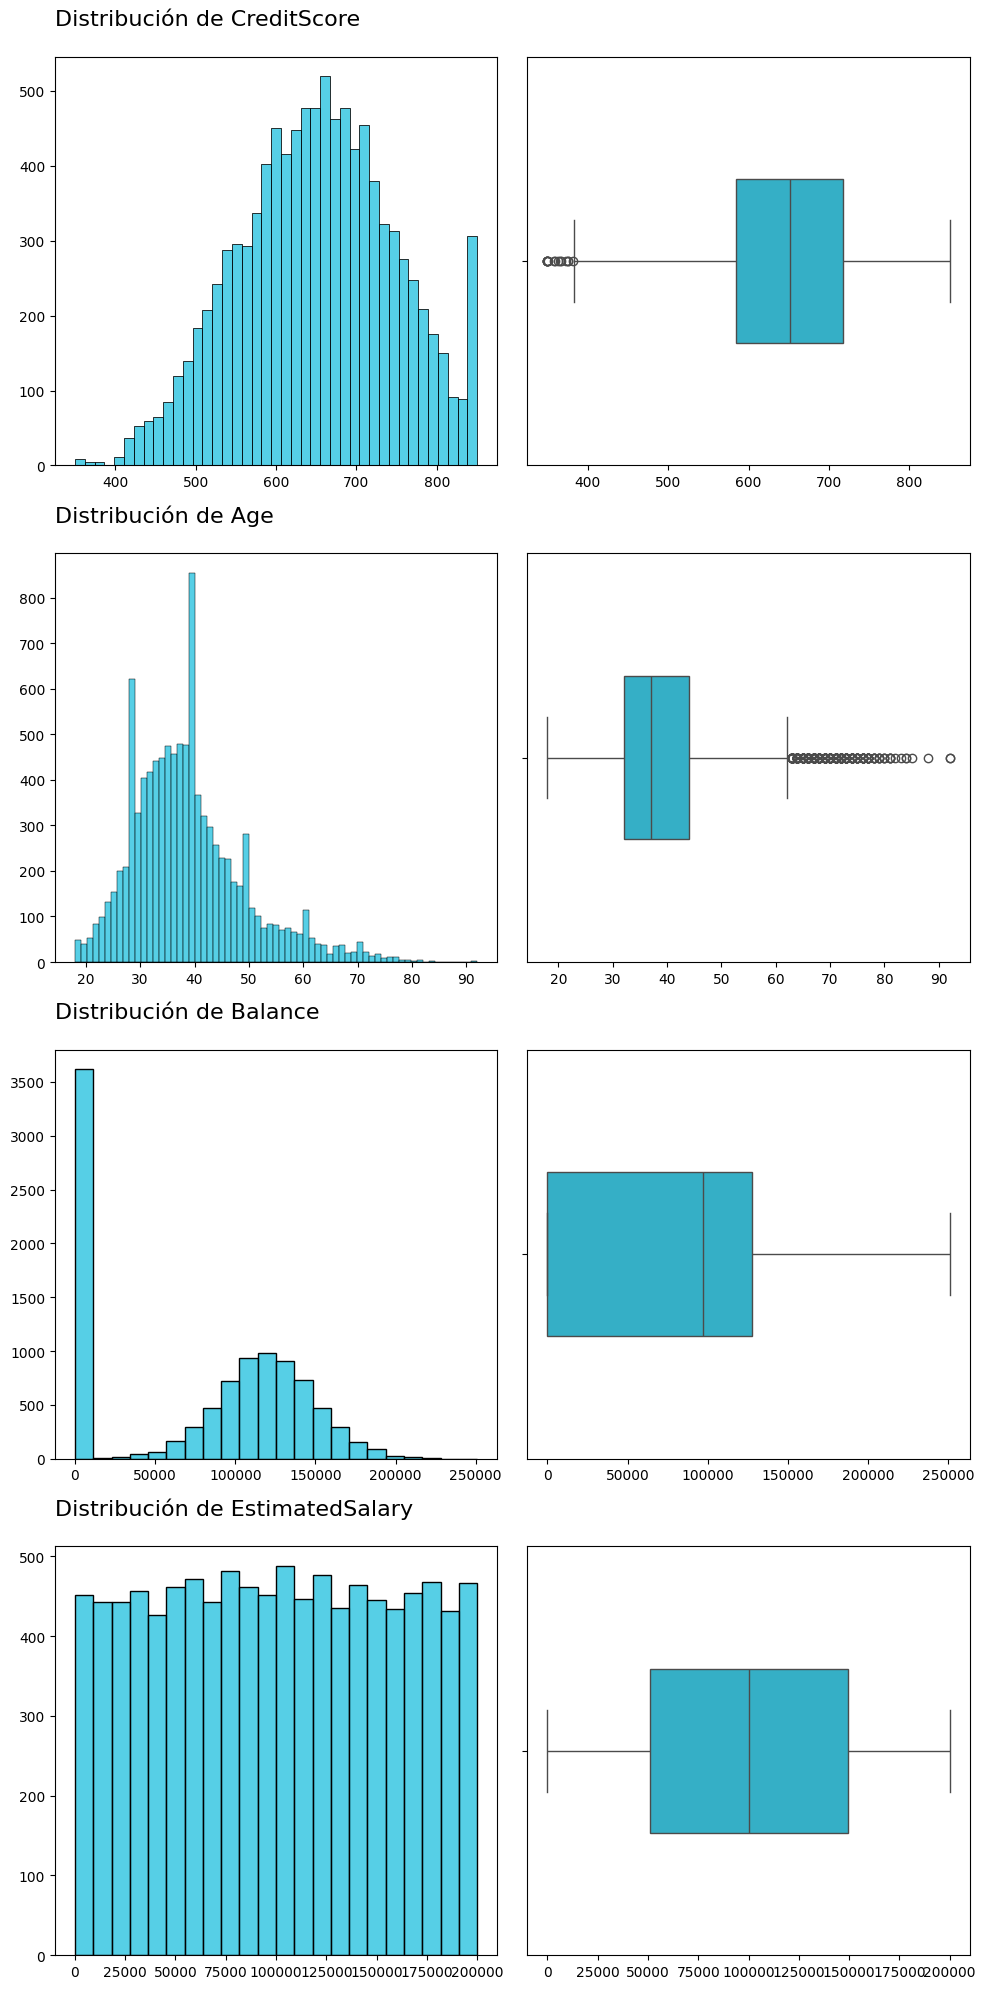

In [35]:
# Crear las figuras necesarias

fig, ax = plt.subplots(len(columnas_numericas), 2, figsize=(10, 20))

for columna in columnas_numericas:
    i=columnas_numericas.index(columna)
    #Histograma
    sns.histplot(data=df,x=columna, ax=ax[i][0], kde=False, color='#1dbfde', edgecolor='black')
    #Boxplot
    sns.boxplot(data=df, x=columna, ax=ax[i][1], orient='h', width=0.4, color='#1dbfde')
    
    # Quitar titulo del eje x
    ax[i][0].set_xlabel("")
    ax[i][1].set_xlabel("")    

     # Quitar titulo del eje y
    ax[i][0].set_ylabel("")
    ax[i][1].set_ylabel("")  

    # Título del gráfico
    ax[i][0].set_title("Distribución de "+ columna+'\n', size=16, loc='left')
    
    
plt.tight_layout()
plt.show()

In [36]:
# Reviso más a profundidad la columna 'Balance'
df['Balance'].value_counts().head(5)

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
Name: count, dtype: int64

In [37]:
(3617/10000)*100

36.17

In [38]:
df[df['Balance']>0].sort_values(by='Balance').head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8427,15806771,Yefremova,753,France,Female,40,0,3768.69,2,1,0,177065.24,1
5686,15713774,Chikwendu,644,Spain,Female,46,6,12459.19,1,0,0,156787.34,1
1791,15776467,De Salis,702,Spain,Female,35,8,14262.80,2,1,0,54689.16,0
5048,15741416,Yegorov,707,France,Male,42,2,16893.59,1,1,1,77502.56,0
6029,15669011,Bocharova,659,France,Female,44,9,23503.31,1,0,1,169862.01,1


> Depués de 0, el siguiente valor mínimo en la columna Balance es 3768.69

En las estadísticas y gráficos anteriores podemos observar que:

* > El puntaje crediticio de la mayoría de clientes está entre 580 y 720, con un promedio de 652 puntos por cliente. Existen valores atípicos de esta variable que se ubican por debajo de los 400 puntos. El valor mínimo de puntaje es 350 puntos.
* > La mayoría de los clientes tienen edades entre 32 y 44 años, con un promedio de 39 años por cliente. Existen valores atípicos de esta variable que se ubican por encima de los 62 años. El valor máximo de edad es 92 años.
*  > EL 36.17% de los clientes posee balance 0 en el banco. El resto de clientes posee un balance promedio de 127.000 USD.
*  > El salario estimado de los cliente se encuentra entre 50.000 y 150.000 USD, con un salario promedio de 100.000 USD por cliente.

### Análisis bivariado

In [42]:
# Creo tabla pivot 
df_pivot=df.pivot_table(index='HasCrCard', 
                  columns='Exited', 
                  values='CustomerId', 
                  aggfunc='count')
df_pivot

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


[Text(0, 0, '2945'), Text(0, 0, '7055')]

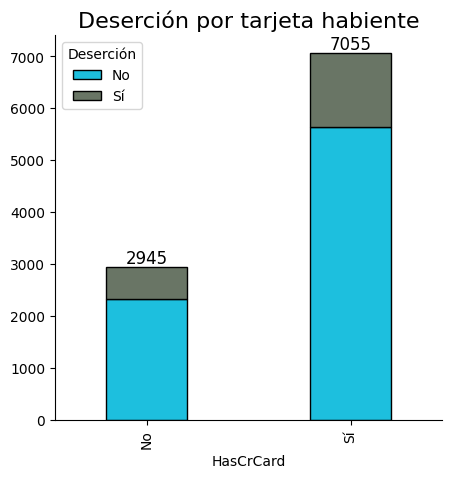

In [43]:
#Distribución de la deserción por tarjeta habiente

#Creo un gráfico de barras apiladas
graph1=df_pivot.plot.bar(width=0.4,
              color=('#1dbfde','#697565'),
              edgecolor='black',
              xlabel='HasCrCard',           
              figsize=(5,5),        
              stacked=True)
# Título del gráfico
graph1.set_title("Deserción por tarjeta habiente", size=16)

#Modifico nombres mostrados en leyenda
plt.legend(labels=['No','Sí'],
           title='Deserción')

#Modifico nombres mostrados en series del eje X
graph1.set_xticklabels(['No','Sí'])

# Quitar el borde del gráfico
graph1.spines['top'].set_visible(False)
graph1.spines['right'].set_visible(False)

#Agrego etiquetas de datos
plt.bar_label(graph1.containers[1],size=12)

> Los tarjeta habientes desertan más

In [45]:
# Creo tabla pivot 
df_pivot=df.pivot_table(index='IsActiveMember', 
                  columns='Exited', 
                  values='CustomerId', 
                  aggfunc='count')
df_pivot

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


[Text(0, 0, '4849'), Text(0, 0, '5151')]

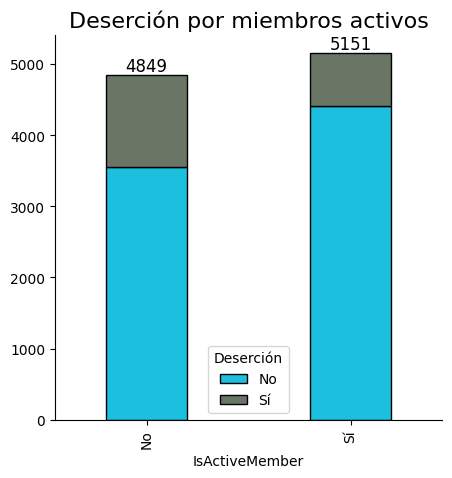

In [46]:
#Distribución de la deserción por miembros activos

#Creo un gráfico de barras apiladas
graph1=df_pivot.plot.bar(width=0.4,
              color=('#1dbfde','#697565'),
              edgecolor='black',
              xlabel='IsActiveMember',           
              figsize=(5,5),        
              stacked=True)
# Título del gráfico
graph1.set_title("Deserción por miembros activos", size=16)

#Modifico nombres mostrados en leyenda
plt.legend(labels=['No','Sí'],
           title='Deserción')

#Modifico nombres mostrados en series del eje X
graph1.set_xticklabels(['No','Sí'])

# Quitar el borde del gráfico
graph1.spines['top'].set_visible(False)
graph1.spines['right'].set_visible(False)

#Agrego etiquetas de datos
plt.bar_label(graph1.containers[1],size=12)

> Los miembros inactivos desertan más

In [48]:
# Creo tabla pivot 
df_pivot=df.pivot_table(index='Geography', 
                  columns='Exited', 
                  values='CustomerId', 
                  aggfunc='count')
df_pivot

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


[Text(0, 0, '5014'), Text(0, 0, '2509'), Text(0, 0, '2477')]

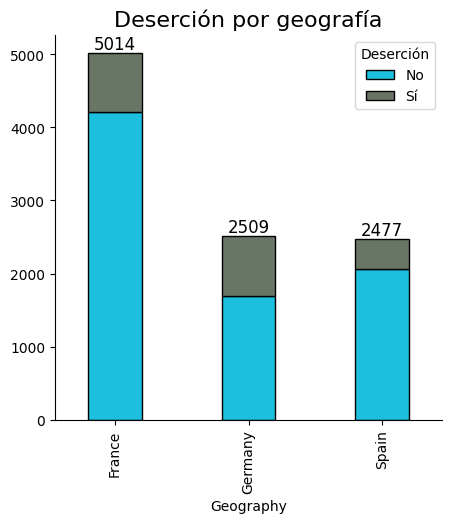

In [49]:
#Distribución de la deserción por geografía

#Creo un gráfico de barras apiladas
graph1=df_pivot.plot.bar(width=0.4,
              color=('#1dbfde','#697565'),
              edgecolor='black',
              xlabel='Geography',           
              figsize=(5,5),        
              stacked=True)
# Título del gráfico
graph1.set_title("Deserción por geografía", size=16)

#Modifico nombres mostrados en leyenda
plt.legend(labels=['No','Sí'],
           title='Deserción')

# Quitar el borde del gráfico
graph1.spines['top'].set_visible(False)
graph1.spines['right'].set_visible(False)

#Agrego etiquetas de datos
plt.bar_label(graph1.containers[1],size=12)

> Los clientes de Francias y Alemania desertan más. De hecho son el doble que los de España

In [51]:
# Creo tabla pivot 
df_pivot=df.pivot_table(index='Tenure', 
                  columns='Exited', 
                  values='CustomerId', 
                  aggfunc='count')
df_pivot

Exited,0,1
Tenure,,
0,318,95
1,803,232
2,847,201
3,796,213
4,786,203
5,803,209
6,771,196
7,851,177
8,828,197


[Text(0, 0, '413'),
 Text(0, 0, '1035'),
 Text(0, 0, '1048'),
 Text(0, 0, '1009'),
 Text(0, 0, '989'),
 Text(0, 0, '1012'),
 Text(0, 0, '967'),
 Text(0, 0, '1028'),
 Text(0, 0, '1025'),
 Text(0, 0, '984'),
 Text(0, 0, '490')]

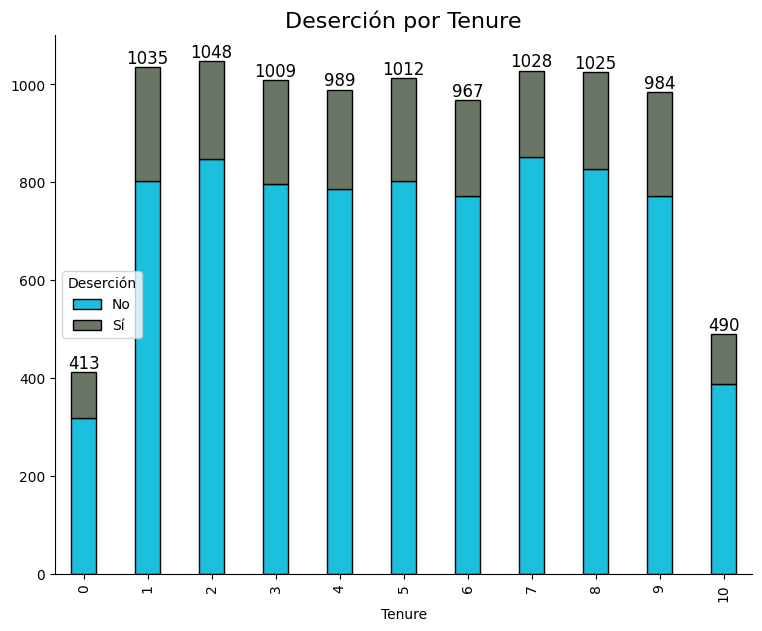

In [52]:
#Distribución de la deserción por Tenure

#Creo un gráfico de barras apiladas
graph1=df_pivot.plot.bar(width=0.4,
              color=('#1dbfde','#697565'),
              edgecolor='black',
              xlabel='Tenure',           
              figsize=(9,7),        
              stacked=True)
# Título del gráfico
graph1.set_title("Deserción por Tenure", size=16)

#Modifico nombres mostrados en leyenda
plt.legend(labels=['No','Sí'],
           title='Deserción')

# Quitar el borde del gráfico
graph1.spines['top'].set_visible(False)
graph1.spines['right'].set_visible(False)

#Agrego etiquetas de datos
plt.bar_label(graph1.containers[1],size=12)

> Los clientes con tenure 1 desertan más

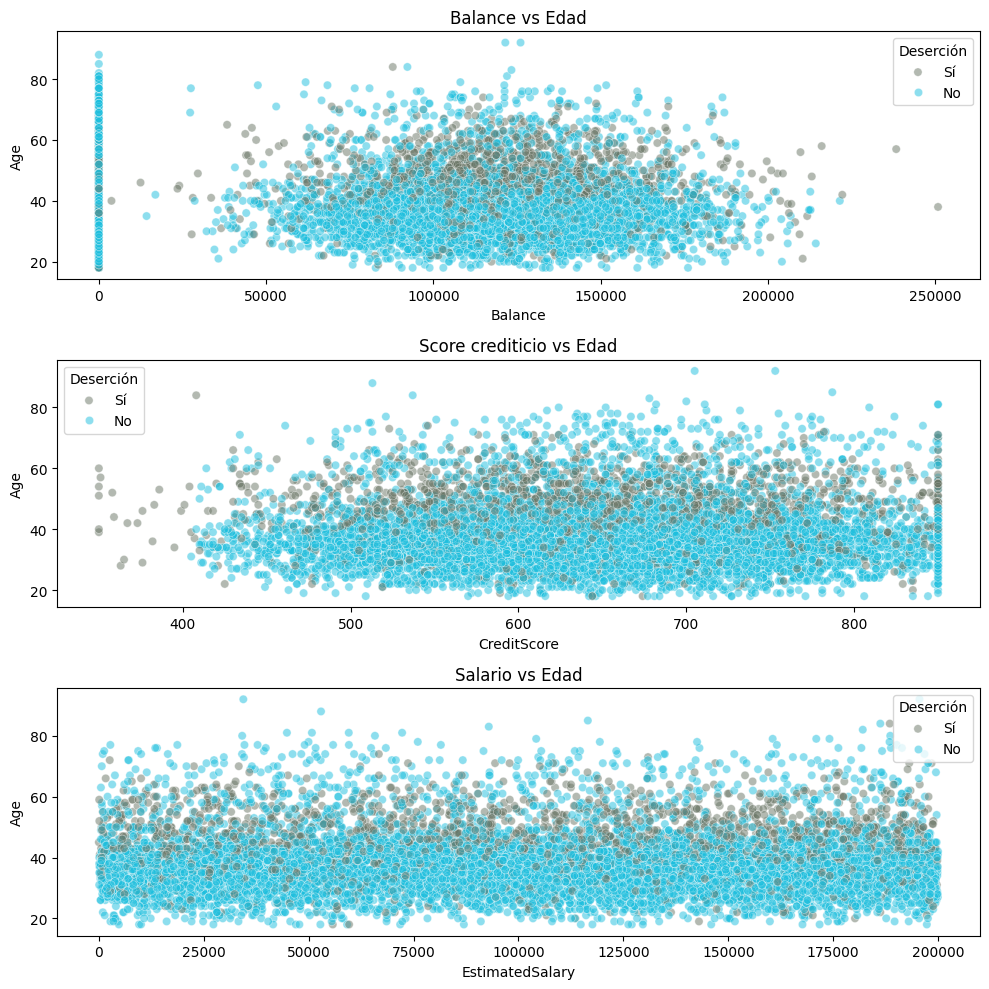

In [54]:
# Crear el lienzo con dos gráficos 
fig, axes = plt.subplots(nrows=3, figsize=(10, 10))

# Crear los gráficos de dispersión 
sns.scatterplot(data=df, x='Balance', y='Age', hue='Exited', ax=axes[0], alpha=0.5, palette=['#1dbfde','#697565'])
axes[0].legend(fontsize=8, loc='upper right')
sns.scatterplot(data=df, x='CreditScore', y='Age', hue='Exited', ax=axes[1], alpha=0.5, palette=['#1dbfde','#697565'])
axes[1].legend(fontsize=8, loc='upper right')
sns.scatterplot(data=df, x='EstimatedSalary', y='Age', hue='Exited', ax=axes[2], alpha=0.5, palette=['#1dbfde','#697565'])
axes[2].legend(fontsize=8, loc='upper right')
    
# Añadir títulos y etiquetas 
axes[0].set_title('Balance vs Edad')
axes[1].set_title('Score crediticio vs Edad')
axes[2].set_title('Salario vs Edad')

# Modifico leyenda
axes[0].legend(labels=['Sí','No'], title='Deserción')
axes[1].legend(labels=['Sí','No'], title='Deserción')
axes[2].legend(labels=['Sí','No'], title='Deserción')

plt.tight_layout()
plt.show()

> De las gráficas anteriores podemos observar que a mayor edad del cliente, la tendencia de deserción también es mayor

## 1. Encontrar las variables más relevantes para discriminar entre clientes que desertan y clientes que no desertan.

### 1.1. Matriz de correlación

**Se considerará lo siguiente para el análisis**
* > **0** representa **No o Falso**
* > **1** representa **Sí o Verdadero**

In [59]:
# Codificar variables categóricas
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Tenure']= label_encoder.fit_transform(df['Tenure'])

In [60]:
# Crea una matriz de correlación
corr_mtx=df[['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'CreditScore', 'Age',	'Balance',	'EstimatedSalary', 'Exited']].corr()
corr_mtx

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,CreditScore,Age,Balance,EstimatedSalary,Exited
Geography,1.000000,0.004719,0.003739,0.003972,-0.008523,0.006724,0.007888,0.022812,0.069408,-0.001369,0.035943
Gender,0.004719,1.000000,0.014733,-0.021859,0.005766,0.022544,-0.002857,-0.027544,0.012087,-0.008112,-0.106512
Tenure,0.003739,0.014733,1.000000,0.013444,0.022583,-0.028362,0.000842,-0.009997,-0.012254,0.007784,-0.014001
NumOfProducts,0.003972,-0.021859,0.013444,1.000000,0.003183,0.009612,0.012238,-0.030680,-0.304180,0.014204,-0.047820
HasCrCard,-0.008523,0.005766,0.022583,0.003183,1.000000,-0.011866,-0.005458,-0.011721,-0.014858,-0.009933,-0.007138
IsActiveMember,0.006724,0.022544,-0.028362,0.009612,-0.011866,1.000000,0.025651,0.085472,-0.010084,-0.011421,-0.156128
CreditScore,0.007888,-0.002857,0.000842,0.012238,-0.005458,0.025651,1.000000,-0.003965,0.006268,-0.001384,-0.027094
Age,0.022812,-0.027544,-0.009997,-0.030680,-0.011721,0.085472,-0.003965,1.000000,0.028308,-0.007201,0.285323
Balance,0.069408,0.012087,-0.012254,-0.304180,-0.014858,-0.010084,0.006268,0.028308,1.000000,0.012797,0.118533
EstimatedSalary,-0.001369,-0.008112,0.007784,0.014204,-0.009933,-0.011421,-0.001384,-0.007201,0.012797,1.000000,0.012097


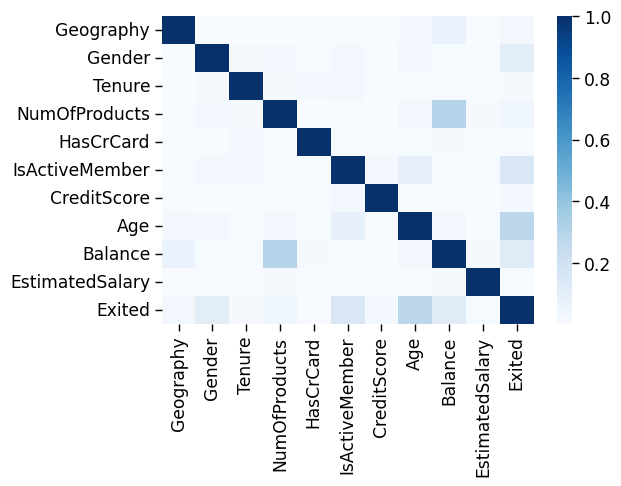

In [61]:
# Visualizar matriz de correlación:
plt.figure(figsize=(6,4))
sns.set_context('paper', font_scale=1.4)
# Calcular los valores absolutos de la matriz de correlación
correlacion_abs = np.abs(corr_mtx)
sns.heatmap(correlacion_abs, cmap='Blues')
plt.show()

De la matriz de correlación y del gráfico observamos que:

* > NO se observan valores cercanos a 1, por lo que NO existen variables que estén fuertemente correlacionadas entre sí

### 1.2. Modelo random forest

In [64]:
# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=[ 'CustomerId', 'Surname', 'Exited'],axis=1)
y = df['Exited']

In [65]:
# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
#Obtener el número de filas en el conjunto de entrenamiento y prueba
print("Filas en el conjunto de entrenamiento:",len(y_train))
print("Filas en el conjunto de prueba:",len(y_test))

Filas en el conjunto de entrenamiento: 8000
Filas en el conjunto de prueba: 2000


In [67]:
# Entrenar el modelo RandomForest para identificar la importancia de las características
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
# Obtener la importancia de las características
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances

Age                0.240453
EstimatedSalary    0.148004
CreditScore        0.142369
Balance            0.138670
NumOfProducts      0.132061
Tenure             0.080932
IsActiveMember     0.042807
Geography          0.037402
Gender             0.019032
HasCrCard          0.018269
dtype: float64

#### Respuesta

El modelo nos indica que las variables más relevantes para discriminar la deserción son:
* > La edad (24.04%)
* > El salario (14.8%)
* > El score crediticio (14.23%)
* > El balance (13.86%)
* > El número de productos (13.20%)

## 2. Elaborar un modelo con las variables identificadas que más discriminan la deserción con el objetivo de predecir la deserción

In [72]:
df.keys()

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [73]:
# Definir las características relevantes (X) y la variable objetivo (y)
X = df.drop(columns=[ 'CustomerId', 'Surname', 'Tenure', 'Geography', 'Gender','Exited','HasCrCard','IsActiveMember'],axis=1)
y = df['Exited']

In [74]:
#Estandarizo valores de las variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)

In [75]:
# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
#Obtener el número de filas en el conjunto de entrenamiento y prueba
print("Filas en el conjunto de entrenamiento:",len(y_train))
print("Filas en el conjunto de prueba:",len(y_test))

Filas en el conjunto de entrenamiento: 8000
Filas en el conjunto de prueba: 2000


In [77]:
#Uso modelo RandomForest
rf_model = RandomForestClassifier(random_state=42)

#Entrenar a ese objeto
rf_model.fit(X_train, y_train)

#Hago las predicciones
predictions = rf_model.predict(X_test)  

#### 2.1. Evaluar el modelo

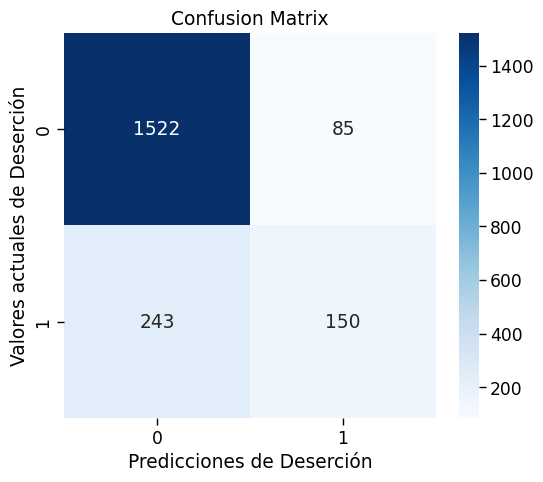

In [79]:
from sklearn.metrics import confusion_matrix

#Calculo matriz de confusión
mc=confusion_matrix(y_test, predictions)

# Crear el mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(mc, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicciones de Deserción')
plt.ylabel('Valores actuales de Deserción')
plt.title('Confusion Matrix')
plt.show()

In [80]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(mc)
print('Classification Report:')
print(class_report)

Accuracy: 0.836
Confusion Matrix:
[[1522   85]
 [ 243  150]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.64      0.38      0.48       393

    accuracy                           0.84      2000
   macro avg       0.75      0.66      0.69      2000
weighted avg       0.82      0.84      0.82      2000



In [81]:
#Evaluo modelo para nuevos clientes

nuevos_clientes = pd.DataFrame({
    'CreditScore':[750,550,800],
    'Age':[35,23,70],
    'Balance':[15000.00,4000.00,500.00],
    'NumOfProducts':[2,1,4],
    'EstimatedSalary':[3000.00,1000.00,5000.00]
})

nuevos_clientes

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary
0,750,35,15000.0,2,3000.0
1,550,23,4000.0,1,1000.0
2,800,70,500.0,4,5000.0


In [82]:
rf_model.predict(nuevos_clientes)

C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1, 0, 1], dtype=int64)

> Al evaluar el modelo para nuevos clientes, arroja que el cliente 0 desertará, el cliente 1 no desertará y el cliente 2 desertará.

## 3. Comentar e interpretar los resultados del modelo

> El modelo clasificó los datos correctamente el 83.6% de las veces. De acuerdo al índice F1-score, el modelo tiene una precisión de 90% para clasificar a los clientes que NO desertarán y una precisión del 48% para clasificar a los que SI lo harán

## 4. Elabora un modelo logit con las mismas variables del modelo anterior

In [87]:
# Definir las características relevantes (X) y la variable objetivo (y)
X = df.drop(columns=[ 'CustomerId', 'Surname', 'Tenure', 'Geography', 'Gender','Exited','HasCrCard','IsActiveMember'],axis=1)
y = df['Exited']

In [88]:
#Estandarizo valores de las variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)

In [89]:
# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.linear_model import LogisticRegression

#Creo un objeto de regresión logística
LR =LogisticRegression()

#Entrenar a ese objeto
LR.fit(X_train, y_train)

#Hago las predicciones
predictions = LR.predict(X_test)   


#### 4.1. Evaluar el modelo

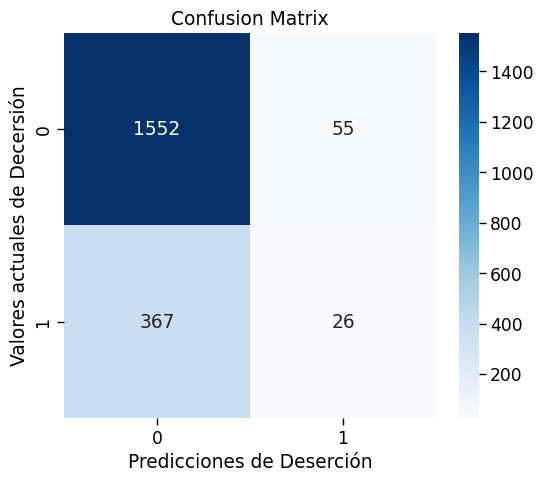

In [92]:
from sklearn.metrics import confusion_matrix

#Calculo matriz de confusión
mc=confusion_matrix(y_test, predictions)

# Crear el mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(mc, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicciones de Deserción')
plt.ylabel('Valores actuales de Decersión')
plt.title('Confusion Matrix')
plt.show()

In [93]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(mc)
print('Classification Report:')
print(class_report)

Accuracy: 0.789
Confusion Matrix:
[[1552   55]
 [ 367   26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1607
           1       0.32      0.07      0.11       393

    accuracy                           0.79      2000
   macro avg       0.56      0.52      0.50      2000
weighted avg       0.71      0.79      0.73      2000



## 5. Comentar e interpretar los resultados del modelo

> El modelo clasificó los datos correctamente el 78.9% de las veces. De acuerdo al índice F1-score, el modelo tiene una precisión de 88% para clasificar a los clientes que NO desertarán y una precisión del 11% para clasificar a los que SI lo harán

## 6. Comparar los resultados del modelo logit vs el otro modelo. ¿Cuál es mejor? ¿Por qué?

* > El modelo Random Forest es mejor. Observamos que tiene mejor precisión para la clasificación de los clientes y también tiene mejor índice f1-score que el modelo logit.
* > Random Forest proporciona una estimación de la importancia de las características que son relevantes para predecir la deserción, esto lo hace ser mejor en el caso de predecir esta variable

---------------------------------------

# Índice y Agrupaciones

Se trata de un conjunto de datos de 5000 clientes y tres columnas: Frecuencia (número de
transacciones), Transaccionalidad (monto en USD de las transacciones) e Ingresos (USD). Elaborar
un índice por cliente que recoja el comportamiento de las tres columnas y caraterizar a los
clientes en grupos.

## Descripción de los datos


* **Frecuencia**:Number of transactions over a month (January)
* **Transaccionalidad** :Sum of the values over all transactions in that month
* **Ingresos** :Client Income

In [103]:
!pip install pyreadr

In [104]:
#Librería para importar archivos .RData
import pyreadr

In [105]:
#lee el archivo .RData y lo asigna a la variable 'data'
data=pyreadr.read_r('FRI.RData')

In [106]:
#Extrae los dataframes del archivo .RData y asigna a un dataframe
for nombre, df in data.items():
    print(f"Nombre del dataframe: {nombre}")
    print(df.head())

Nombre del dataframe: FRI
   Frecuencia  Transaccionalidad  Ingresos
0         5.0             121.36   1918.00
1         1.0               0.02   2000.00
2        36.0            6786.87    860.69
3         8.0              62.87   1354.39
4        12.0            1978.01   1586.03


In [107]:
df.head()

,Frecuencia,Transaccionalidad,Ingresos
0,5.0,121.36,1918.00
1,1.0,0.02,2000.00
2,36.0,6786.87,860.69
3,8.0,62.87,1354.39
4,12.0,1978.01,1586.03


In [108]:
#Reviso información general de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frecuencia         5000 non-null   float64
 1   Transaccionalidad  5000 non-null   float64
 2   Ingresos           5000 non-null   float64
dtypes: float64(3)
memory usage: 117.3 KB


In [109]:
# Reviso la dimensión del dataframe
df.shape

(5000, 3)

In [110]:
#Guardo el total de registros en una variable
total_records=df.shape[0]

## Limpieza y transformación de los datos

In [112]:
#Reviso nulos
df.isna().sum()

Frecuencia           0
Transaccionalidad    0
Ingresos             0
dtype: int64

>No existen valores nulos. OK

In [114]:
#Reviso registros duplicados
df.duplicated().sum()

284

In [115]:
(df.duplicated().sum()/total_records)*100

5.680000000000001

>Existen 284 registros duplicados, los cuales representan el 5.68% de los registros

> Como NO tengo un ID de cliente para discriminar datos duplicados, voy a mantener estos registros

## Análisis Expliratorio de Datos (EDA)

### Análisis univariado

#### Columna Frecuencia

In [121]:
#Observo las estadísticas de la columna
df['Frecuencia'].describe()

count    5000.000000
mean       13.883000
std        12.653036
min         1.000000
25%         4.000000
50%        11.000000
75%        20.000000
max       148.000000
Name: Frecuencia, dtype: float64

**INTERPRETACION**
* > En este mes, los clientes realizaron aproximadamente 14 transacciones en promedio
* > La mediana es de 11 transacciones por cliente en este mes
* > El mínimo de transacciones registradas por un cliente en este mes es de 1
* > El máximo de transacciones registradas por un cliente en este mes es de 148
* > El 75% de los clientes realizó hasta 20 transacciones este mes

In [123]:
#Hago un conteo de valores para tener una idea de la distribución de los datos
#Muestro los 20 primeros valores
df['Frecuencia'].value_counts().head(20)

Frecuencia
1.0     510
2.0     378
3.0     222
4.0     218
5.0     210
8.0     198
6.0     193
13.0    183
9.0     181
7.0     164
10.0    164
12.0    162
11.0    154
15.0    145
14.0    130
17.0    129
18.0    128
16.0    128
19.0    127
22.0     93
Name: count, dtype: int64

In [124]:
#Guardo valores máximos en variables
vc_frec=df['Frecuencia'].value_counts()
valor_maximo = vc_frec.idxmax()
frec_maxima = vc_frec.max()

In [125]:
print ('La frecuencia que más se repite es', valor_maximo, 'con', frec_maxima, 'veces.\nEsto significa que el',(frec_maxima/total_records)*100,'%','de los clientes ha hecho solamente', valor_maximo,'transacción en el mes')

La frecuencia que más se repite es 1.0 con 510 veces.
Esto significa que el 10.2 % de los clientes ha hecho solamente 1.0 transacción en el mes


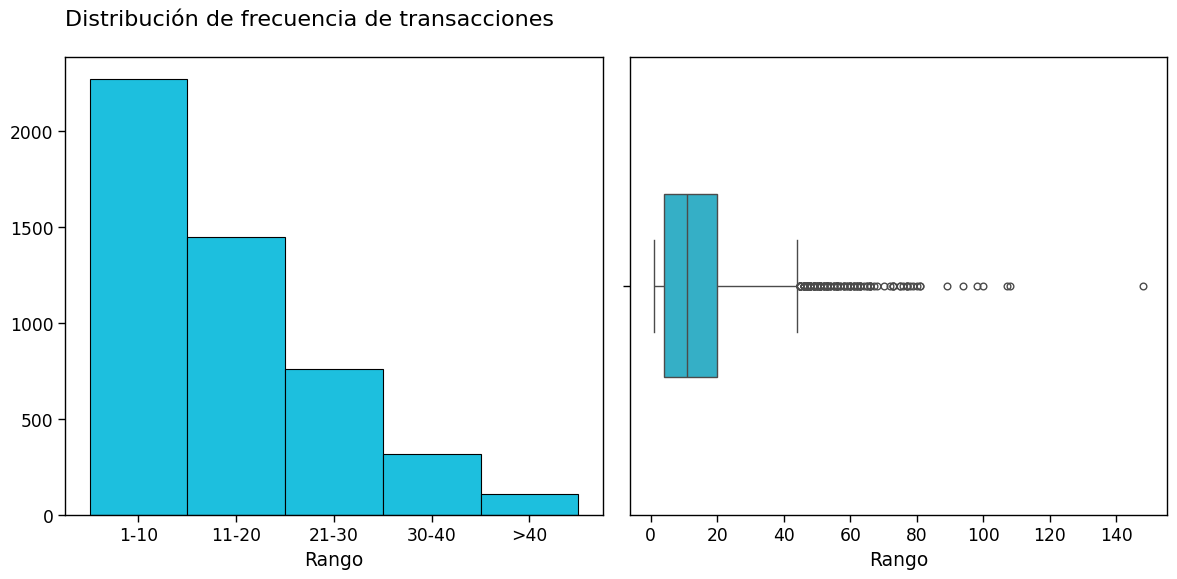

In [126]:
# Crear las figuras necesarias

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#Defino rangos
bins=[0, 10, 20, 30, 40, 50]

#Histograma
ax[0].hist(df['Frecuencia'], bins=bins, color='#1dbfde', edgecolor='black')
    
#Boxplot
sns.boxplot(data=df, x='Frecuencia', ax=ax[1], orient='h', width=0.4, color='#1dbfde')
    
#titulo del eje x
ax[0].set_xlabel("Rango")
ax[1].set_xlabel("Rango")   

#Modificar rango del eje x
ax[0].set_xticks([5, 15, 25, 35, 45], ['1-10', '11-20', '21-30', '30-40', '>40'])

# Título del gráfico
ax[0].set_title('Distribución de frecuencia de transacciones\n', size=16, loc='left')

plt.tight_layout()
plt.show()

> Del gráfico boxplot, observamos que existen valores extremos en la columna Frecuencia

In [128]:
#Calculo cuántos registros están dentro del rango de 1 a 10 transacciones
mask=df['Frecuencia']<=10
(df.loc[mask,'Frecuencia'].size/total_records)*100

48.76

> Un 48.76% de los clientes realiza entre 1 y 10 transacciones en el mes

In [130]:
#Calculo cuántos registros están dentro del rango de 10 a 20 transacciones
mask=((df['Frecuencia']>10) & (df['Frecuencia']<=20))
(df.loc[mask,'Frecuencia'].size/total_records)*100

27.560000000000002

> Un 27.56% de los clientes realiza entre 10 y 20 transacciones en el mes

In [132]:
#Calculo cuántos registros están dentro del rango de 20 a 30 transacciones
mask=((df['Frecuencia']>20) & (df['Frecuencia']<=30))
(df.loc[mask,'Frecuencia'].size/total_records)*100

14.299999999999999

> Un 14.3% de los clientes realiza entre 20 y 30 transacciones en el mes

In [134]:
#Calculo cuántos registros están dentro del rango de 30 a 40 transacciones
mask=((df['Frecuencia']>30) & (df['Frecuencia']<=40))
(df.loc[mask,'Frecuencia'].size/total_records)*100

5.84

> Un 5.84% de los clientes realiza entre 30 y 40 transacciones en el mes

In [136]:
#Calculo cuántos registros están dentro del rango de mayor a 40 transacciones
mask=df['Frecuencia']>40
(df.loc[mask,'Frecuencia'].size/total_records)*100

3.54

> Un 3.54% de los clientes realiza más de 40 transacciones en el mes

#### Columna Transaccionalidad

In [139]:
#Observo las estadísticas de la columna
df['Transaccionalidad'].describe()

count      5000.000000
mean       2578.323684
std        6953.011936
min           0.010000
25%         248.235000
50%        1521.285000
75%        2461.582500
max      190517.800000
Name: Transaccionalidad, dtype: float64

**INTERPRETACION**
* > En este mes, el monto total de los movimientos de los clientes fue de 2578.32 USD en promedio
* > La mediana del monto total de los movimientos de los clientes en este mes es de 1521.29 USD
* > El mínimo monto total de los movimientos registrados por un cliente en este mes es de 0.01 USD
* > El máximo monto total de los movimientos registrados por un cliente en este mes es de 190517.8 USD
* > El 75% de los clientes realizó movimientos por montos totales de hasta 2461.58 USD este mes

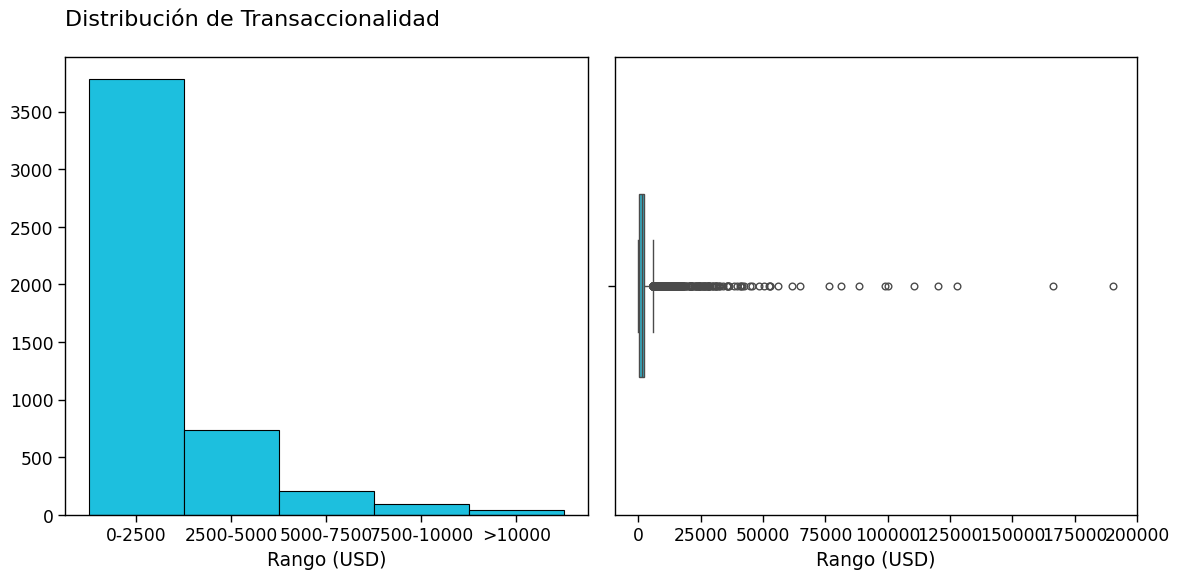

In [141]:
# Crear las figuras necesarias

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#Defino rangos
bins=[0, 2500, 5000, 7500, 10000, 12500]

#Histograma
ax[0].hist(df['Transaccionalidad'], bins=bins, color='#1dbfde', edgecolor='black')
    
#Boxplot
sns.boxplot(data=df, x='Transaccionalidad', ax=ax[1], orient='h', width=0.4, color='#1dbfde')
    
#titulo del eje x
ax[0].set_xlabel("Rango (USD)")
ax[1].set_xlabel("Rango (USD)")    

#Modificar rango del eje x
ax[0].set_xticks([1250, 3750, 6250, 8750, 11250], ['0-2500', '2500-5000', '5000-7500', '7500-10000', '>10000'])

# Título del gráfico
ax[0].set_title('Distribución de Transaccionalidad \n', size=16, loc='left')

plt.tight_layout()
plt.show()

> Del gráfico boxplot, observamos que existen valores muy extremos en la columna Transaccionalidad

In [143]:
#Calculo cuántos registros están dentro del rango de 0 a 2500 USD
mask2=df['Transaccionalidad']<=2500
(df.loc[mask2,'Transaccionalidad'].size/total_records)*100

75.72

> El 75.72% de los clientes movió un monto total de hasta 2500 USD en el mes

In [145]:
#Calculo cuántos registros están dentro del rango de 2500 a 5000 USD
mask2=((df['Transaccionalidad']>2500) & (df['Transaccionalidad']<=5000))
(df.loc[mask2,'Transaccionalidad'].size/total_records)*100

14.680000000000001

> El 14.68% de los clientes movió un monto total de 2500 a 5000 USD en el mes

In [147]:
#Calculo cuántos registros están dentro del rango de 5000 a 7500 USD
mask2=((df['Transaccionalidad']>5000) & (df['Transaccionalidad']<=7500))
(df.loc[mask2,'Transaccionalidad'].size/total_records)*100

4.08

> El 4.08% de los clientes movió un monto total de 5000 a 7500 USD en el mes

In [149]:
#Calculo cuántos registros están dentro del rango de 7500 a 10000 USD
mask2=((df['Transaccionalidad']>7500) & (df['Transaccionalidad']<=10000))
(df.loc[mask2,'Transaccionalidad'].size/total_records)*100

1.92

> El 1.92% de los clientes movió un monto total de 7500 a 10000 USD en el mes

In [151]:
#Calculo cuántos registros están dentro del rango de más de 10000 USD
mask2=df['Transaccionalidad']>10000
(df.loc[mask2,'Transaccionalidad'].size/total_records)*100

3.5999999999999996

> El 3.59% de los clientes movió un monto total mayor a 10000 USD en el mes

#### Columna Ingresos

In [154]:
# Ajustar la configuración de pandas para evitar notación científica
pd.options.display.float_format = '{:,.2f}'.format

In [155]:
#Observo las estadísticas de la columna
df['Ingresos'].describe()

count       5,000.00
mean        1,270.40
std        14,851.51
min             0.00
25%           559.76
50%           849.15
75%         1,200.00
max     1,036,000.00
Name: Ingresos, dtype: float64

**INTERPRETACION**
* > Existe gran variabilidad en magnitud de los datos de ingresos de los clientes. Desde ingresos de 0 hasta ingresos de más de 1M USD. Por lo que no es recomedable fiarse del promedio de ingresos. En su lugar, es mejor referirse a la media de ingresos, que es 849.15 USD
* > El 75% de los clientes percibió ingresos de hasta 1200 USD este mes

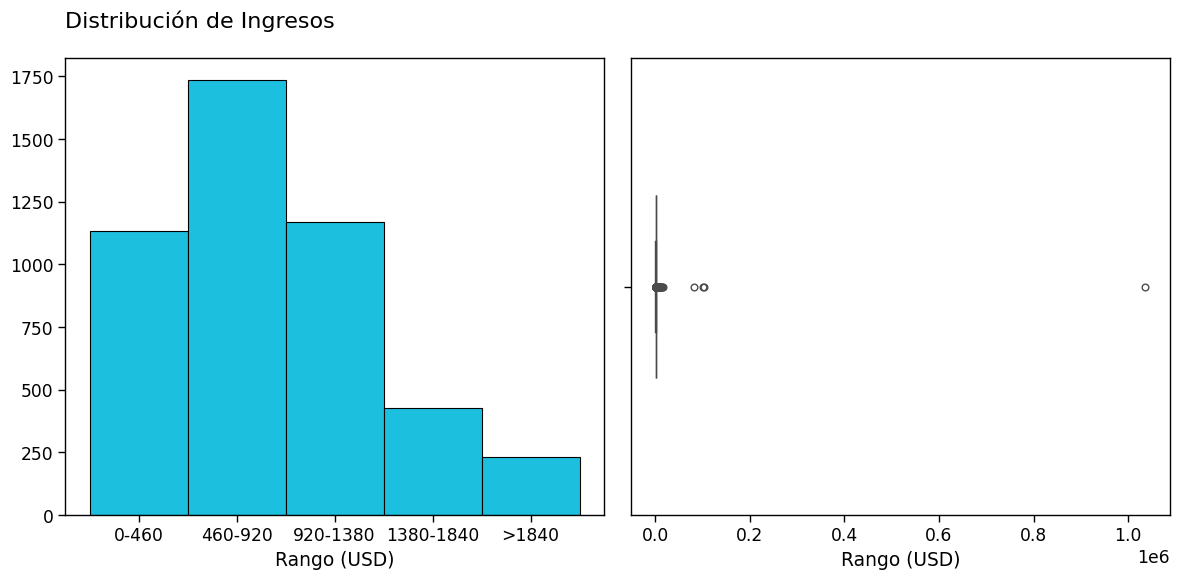

In [157]:
# Crear las figuras necesarias

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#Defino rangos
bins=[0, 460, 920, 1380, 1840, 2300]

#Histograma
ax[0].hist(df['Ingresos'], bins=bins, color='#1dbfde', edgecolor='black')
    
#Boxplot
sns.boxplot(data=df, x='Ingresos', ax=ax[1], orient='h', width=0.4, color='#1dbfde')
    
# Titulo del eje x
ax[0].set_xlabel("Rango (USD)")
ax[1].set_xlabel("Rango (USD)")    

#Modificar rango del eje x
ax[0].set_xticks([230, 690, 1150, 1610, 2070], ['0-460', '460-920', '920-1380', '1380-1840', '>1840'])

# Título del gráfico
ax[0].set_title('Distribución de Ingresos \n', size=16, loc='left')

plt.tight_layout()
plt.show()

> Del gráfico boxplot, observamos que existen valores muy extremos en la columna Ingresos

In [159]:
#Calculo cuántos registros están dentro del rango de 0 a 460 USD
mask3=df['Ingresos']<=460
(df.loc[mask3,'Ingresos'].size/total_records)*100

22.62

> El 22.62% de los clientes recibió ingresos de hasta 460 USD en el mes

In [161]:
#Calculo cuántos registros están dentro del rango de 460 a 920 USD
mask3=((df['Ingresos']>460) & (df['Ingresos']<=920))
(df.loc[mask3,'Ingresos'].size/total_records)*100

34.78

> El 34.78% de los clientes recibió ingresos entre 460 y 920 USD en el mes

In [163]:
#Calculo cuántos registros están dentro del rango de 920 a 1380 USD
mask3=((df['Ingresos']>920) & (df['Ingresos']<=1380))
(df.loc[mask3,'Ingresos'].size/total_records)*100  

23.36

> El 23.26% de los clientes recibió ingresos entre 920 y 1380 USD en el mes

In [165]:
#Calculo cuántos registros están dentro del rango de 1380 a 1840 USD
mask3=((df['Ingresos']>1380) & (df['Ingresos']<=1840))
(df.loc[mask3,'Ingresos'].size/total_records)*100

8.5

> El 8.5% de los clientes recibió ingresos entre 1380 y 1840 USD en el mes

In [167]:
#Calculo cuántos registros están en un rango mayor a 1840 USD
mask3=df['Ingresos']>1840
(df.loc[mask3,'Ingresos'].size/total_records)*100

10.74

> El 10.74% de los clientes recibió ingresos mayores a 1840 USD en el mes

### Análisis bivariado

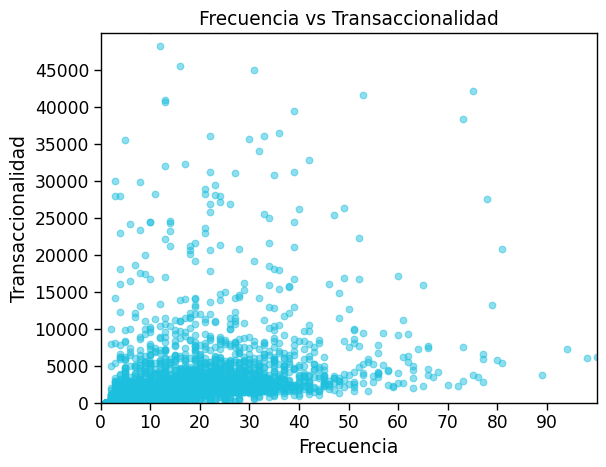

In [170]:
# Crear el gráfico de dispersión entre dos variables
plt.scatter(df['Frecuencia'], df['Transaccionalidad'], alpha=0.5, c='#1dbfde')

# Etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('Transaccionalidad')
plt.title('Frecuencia vs Transaccionalidad')

#Modifico límites de ejes
plt.xlim(0,100)
plt.ylim(0,50000)

#Modifico rango de ejes
plt.xticks(range(0,100,10))
plt.yticks(range(0,50000,5000))

plt.show()


> Este gráfico muestra que la mayoría de clientes realiza de 1 a 40 transacciones en el mes por montos de hasta 5000 USD

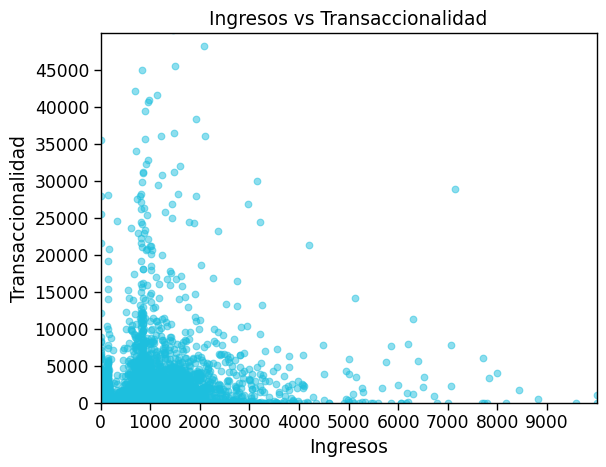

In [172]:
# Crear el gráfico de dispersión entre dos variables
plt.scatter(df['Ingresos'], df['Transaccionalidad'], alpha=0.5, c='#1dbfde')

# Etiquetas y título
plt.xlabel('Ingresos')
plt.ylabel('Transaccionalidad')
plt.title('Ingresos vs Transaccionalidad')

#Modifico límites de ejes
plt.xlim(0,10000)
plt.ylim(0,50000)

#Modifico rango de ejes
plt.xticks(range(0,10000,1000))
plt.yticks(range(0,50000,5000))

plt.show()

> Este gráfico muestra que la mayoría de clientes percibe ingresos hasta 2500 USD en el mes y realiza transacciones por montos de hasta 10000 USD

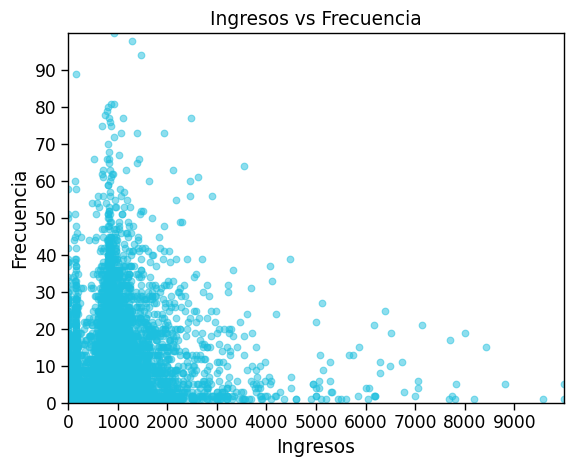

In [174]:
# Crear el gráfico de dispersión entre dos variables
plt.scatter(df['Ingresos'], df['Frecuencia'], alpha=0.5, c='#1dbfde')

# Etiquetas y título
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.title('Ingresos vs Frecuencia')

#Modifico límites de ejes
plt.xlim(0,10000)
plt.ylim(0,100)

#Modifico rango de ejes
plt.xticks(range(0,10000,1000))
plt.yticks(range(0,100,10))

plt.show()

> Este gráfico muestra que la mayoría de clientes percibe ingresos hasta 2500 USD y realiza de 1 a 40 transacciones en el mes

## Modelo para agrupamiento

> Es necesario hacer una estandarización de los datos, ya que tenemos rangos de las columnas muy distintos entre sí y además existen valores muy extremos

In [178]:
#Estandarización de datos
sc = StandardScaler()
std=sc.fit_transform(df[['Frecuencia', 'Transaccionalidad', 'Ingresos']])
std

array([[-0.70211514, -0.35340216,  0.04360967],
       [-1.01827641, -0.37085533,  0.04913154],
       [ 1.7481347 ,  0.60534446, -0.02758953],
       ...,
       [ 1.66909438, -0.10099708, -0.03116259],
       [-0.93923609, -0.3348213 ,  0.00603398],
       [-0.30691355,  0.15897382, -0.01497608]])

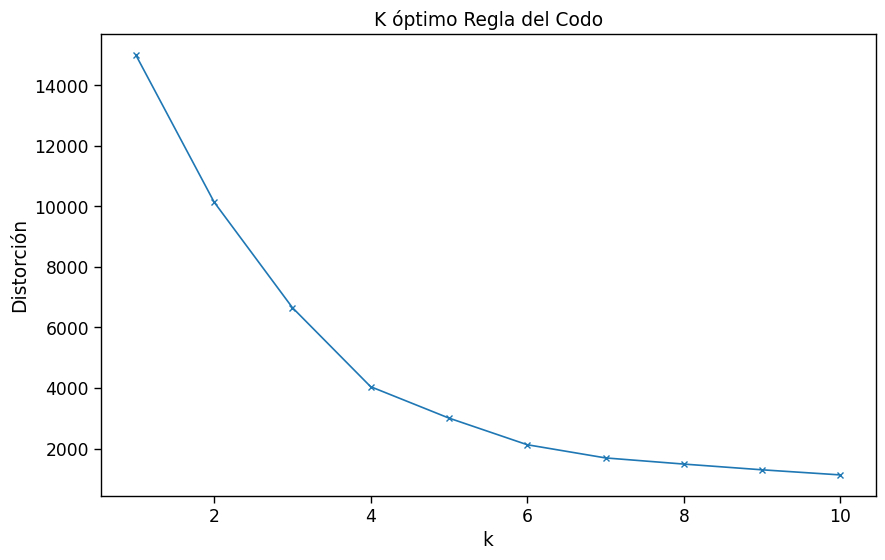

In [179]:
#Regla del codo para determinar cuál sería el número óptimo de clústers (agrupamientos)
distorcion = []

#prueba de 1 a 10 clusters
K = range(1,11)

for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=42, init='k-means++', n_init=10)
    kmeanModel.fit(std)
    distorcion.append(kmeanModel.inertia_) #inercia o suma de la distancia al cuadrado de cada punto a su centroide.

#Gráficamos la inercia    
plt.figure(figsize=(10,6))
plt.plot(K, distorcion, marker='x')
plt.xlabel('k')
plt.ylabel('Distorción')
plt.title('K óptimo Regla del Codo')
plt.show()

>Como vemos del gráfico a partir de k=5 la distoración cambia mínimamente. Por lo que 5 sería un número óptimo de grupos para clasificar a los clientes

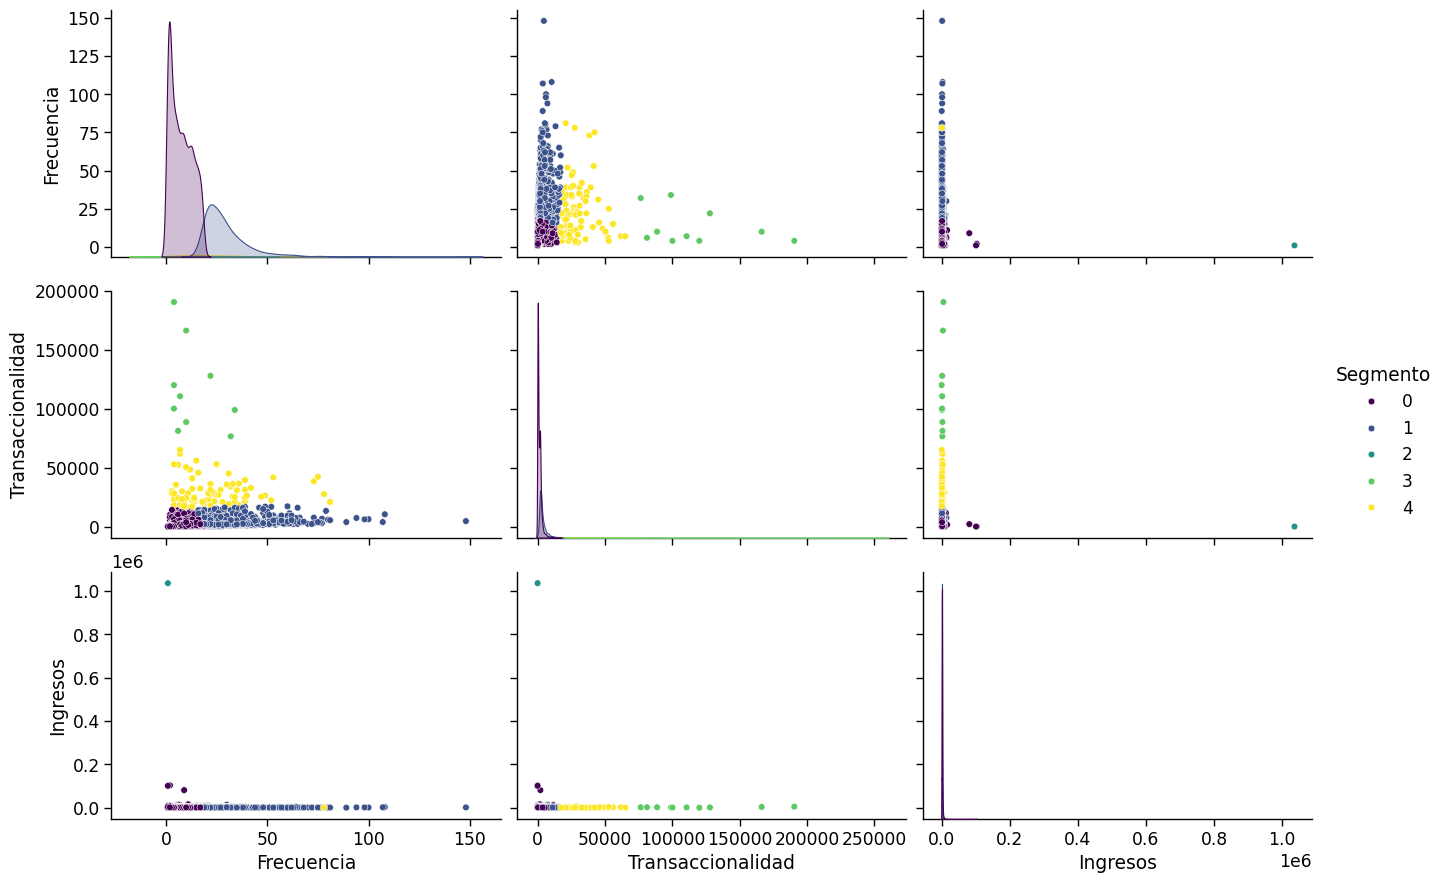

In [181]:
#Calculamos el modelo KMeans con 5 clusters (agrupamientos)
kmeans = KMeans(n_clusters= 5,  init='k-means++', n_init=10, random_state=42)
 
#Aplicamos el modelo 
df['Segmento'] = kmeans.fit_predict(std) 

# Visualización de los clusters
sns.pairplot(df, hue='Segmento', palette='viridis', height=3, aspect=1.5)

plt.show()

In [182]:
# Caracterización de los grupos
# Muestra la media de cada variable
group_characteristics = df.groupby('Segmento').median()
print(group_characteristics)

          Frecuencia  Transaccionalidad     Ingresos
Segmento                                            
0               7.00             672.01       832.77
1              26.00           2,612.64       860.69
2               1.00               0.02 1,036,000.00
3               8.50         105,333.14     1,692.84
4              21.00          26,622.26       962.55


In [183]:
# Conteo de los segmentos de clientes
df['Segmento'].value_counts()

Segmento
0    3527
1    1376
4      86
3      10
2       1
Name: count, dtype: int64

**INTERPRETACION**

* > Segmento 0: En este grupo se encuentran la mayoría de usuarios. Representan el 70.54% de los clientes. Se caracterizan por una baja frecuencia de transacciones (menos de 10 transacciones en el mes), baja transaccionalidad en el mes (una media de 672 USD) y bajos ingresos (una media de 832.77 USD)
* > Segmento 1: Este grupo representa el 27.52% de los clientes. Se caracterizan por hacer la mas alta frecuencia de transacciones (una media de 26 en el mes), una transaccionalidad mayor (una media de 2612.64 USD) e ingresos realtivamente iguales a los del segmento 1 (una media de 860.69 USD)
* > Segmento 2: Este es el grupo minoritario y podríamos decirlo aislado, ya que corresponde solamente a 1 persona que presenta el valor más extremo en cuanto ingresos (superando el millón de dólares). Debido a esto, el modelo lo caracteriza como un grupo ya que se encuentra muy lejos de la distribución normal de los datos. Se puede decir que este cliente prácticamente NO utiliza el servicio bancario porque su frecuencia y transaccionalidad son nulas.
* > Segmento 3: Representa a penas un 0.2% de los clientes. Se catacterizan por hacer aproximandamente la mismas cantidad de transacciones que el segmento 1 (menos de 10 transacciones en el mes), pero se diferencian porque su transaccionalidad es significativamente mayor (una media de 105,333.14 USD en el mes) y tienen el doble de ingresos que los segmentos 1 y 2 (una media de 1692.84 USD).
* > Segmento 4: Representan el 1.12% de los clientes. Se caracterizan por un número mayor de transacciones (una media de 21 en el mes), una transaccionalidad mayor (una media de 16,622.26 USD) e ingresos mayores (una media de 962.55 USD)  

In [185]:
# Muestreo aleatorio de 20 registros de clientes, con su respectiva segmentación
df.sample(20)

,Frecuencia,Transaccionalidad,Ingresos,Segmento
979,16.00,"6,317.14",819.00,0
917,3.00,190.56,0.00,0
1183,5.00,170.44,"1,200.00",0
1143,5.00,234.44,150.00,0
4391,24.00,"1,742.38",810.69,1
4791,18.00,"1,242.93",620.00,0
4202,2.00,19.71,"1,537.91",0
4838,5.00,47.12,"2,206.00",0
1726,31.00,"3,180.70",819.16,1
4626,1.00,0.02,"4,600.00",0
